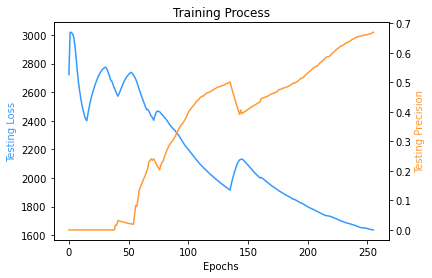

In [5]:

'''
Read cav from tensorboard log and generate graph data
'''

import matplotlib.pyplot as plt
import pandas as pd
from typing import Optional, List, Union, Callable, Dict, Tuple

def tensorboard_smoothing(values: List[float], smooth) -> List[float]:
    norm_factor = 1
    x = 0
    res = []
    for value in values:
        x = x * smooth + value
        res.append(x / norm_factor)
        norm_factor *= smooth
        norm_factor += 1
    return res


fig, ax = plt.subplots(1, 1)    # a figure with a 1x1 grid of Axes
testing_loss = pd.read_csv("../log/csv2graph/run-.-tag-loss_tesing_loss.csv")
testing_precision = pd.read_csv("../log/csv2graph/run-.-tag-precision_validation_precision.csv")
ax.plot(testing_loss['Step'], tensorboard_smoothing(testing_loss['Value'], smooth=0.97), color="#3399FF")

# plot testing precision and use the different y-axis on the right
ax2 = ax.twinx()
ax2.plot(testing_precision['Step'], tensorboard_smoothing(testing_precision['Value'], smooth=0.97), color="#FF9933")
# name the right y-axis
ax2.set_ylabel('Testing Precision', color="#FF9933")

#ax1.set_xticks(np.arange(0, 24, step=2))
ax.set_xlabel("Epochs")
ax.set_ylabel("Testing Loss", color="#3399FF")
ax.set_title("Training Process")
fig.savefig(fname='../log/csv2graph/loss_and_precision'+'.pdf', format='pdf')



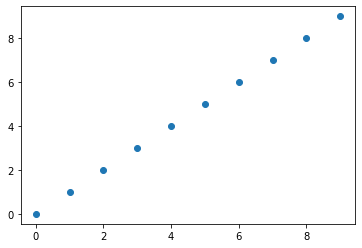

In [20]:
# import matplotlib.pyplot as plt

# f = plt.figure()
# plt.plot(range(10), range(10), "o")
# plt.show()

# f.savefig(fname='../log/csv2graph/test'+'.pdf', bbox_inches='tight')